In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [23]:
from google.colab import files 
uploaded = files.upload()

Saving neyron.csv to neyron (1).csv


In [24]:
train = pd.read_csv("neyron.csv")
print(train)

      Unnamed: 0         id  ... admin_level                  activity
0              0   58421306  ...         2.0  Общественная организация
1              1  125553684  ...         NaN       Молодёжное движение
2              2   29559271  ...         NaN                     Наука
3              3  127643835  ...         NaN                  Институт
4              4   33113779  ...         NaN       Молодёжное движение
...          ...        ...  ...         ...                       ...
2274        2274  175954850  ...         NaN      Стиль, одежда, обувь
2275        2275  182781929  ...         NaN                      Блог
2276        2276  182863061  ...         NaN                  Музыкант
2277        2277  183820588  ...         NaN               Стиль, мода
2278        2278  185764204  ...         NaN      Здоровый образ жизни

[2279 rows x 5 columns]


In [25]:
# Максимальное количество слов 
num_words = 10000
# Максимальная длина названия группы 
max_text_len = 10
# Количество classes
nb_classes = 157

In [26]:
labelencoder=LabelEncoder()
tmp = train['activity'].value_counts()
tmp = pd.DataFrame(tmp)
tmp = tmp.reset_index()
tmp.columns = ['activity', 'counts']
print(tmp)

                            activity  counts
0                               Юмор     357
1                         Творчество      87
2                         Фотография      82
3                    Открытая группа      81
4                        Образование      79
..                               ...     ...
227                        Кулинария       1
228                     Кинематограф       1
229                    Другие услуги       1
230                  Спорт и красота       1
231  Строительные и ремонтные работы       1

[232 rows x 2 columns]


In [27]:
tmp = tmp[tmp['counts'] != 1]
l = list(tmp['activity'])
print(l)

['Юмор', 'Творчество', 'Фотография', 'Открытая группа', 'Образование', 'Публичная страница', 'Стиль, одежда, обувь', 'Одежда, обувь', 'Видеоигры', 'Интернет-СМИ', 'Молодёжное движение', 'Музыкант', 'Художник или художница', 'Культура', 'Кино', 'Литература', 'Анимация', 'Игры', 'Наука', 'Домашние и дикие животные', 'Стиль, мода', 'Городское сообщество', 'Обучающие курсы', 'Техника, электроника', 'Университет', 'Видеоигра', 'Бизнес', 'Rap, Hip-Hop', 'Программирование', 'Общественная организация', 'Дополнительное образование', 'Шоу, передача', 'Дискуссионный клуб', 'Сериал', 'Музыкальная группа', 'Другие товары', 'Блогер', 'Другая музыка', 'Философия', 'Культурный центр', 'Институт', 'Вымышленный персонаж', 'Дизайн и графика', 'Общество', 'Фан-клуб', 'Музей, галерея, выставка', 'Туризм, путешествия', 'Финансы', 'Сайты', 'Стример', 'Здоровый образ жизни', 'Обмен музыкой', 'Программное обеспечение', 'Благотворительная организация', 'Киберспортсмен', 'Отношения полов', 'Астрология, эзотерика

In [28]:
train = train.loc[train['activity'].isin(l)]
print(train)

      Unnamed: 0         id  ... admin_level                  activity
0              0   58421306  ...         2.0  Общественная организация
1              1  125553684  ...         NaN       Молодёжное движение
2              2   29559271  ...         NaN                     Наука
3              3  127643835  ...         NaN                  Институт
4              4   33113779  ...         NaN       Молодёжное движение
...          ...        ...  ...         ...                       ...
2274        2274  175954850  ...         NaN      Стиль, одежда, обувь
2275        2275  182781929  ...         NaN                      Блог
2276        2276  182863061  ...         NaN                  Музыкант
2277        2277  183820588  ...         NaN               Стиль, мода
2278        2278  185764204  ...         NaN      Здоровый образ жизни

[2116 rows x 5 columns]


In [29]:
text = train['name']
print(text)

0       Объединённый совет обучающихся НИЯУ МИФИ
1          «Будь в курсе» | Медиацентр НИЯУ МИФИ
2                                  Science|Наука
3                                 ИИКС НИЯУ МИФИ
4                   МКИ (Совет обучающихся МФТИ)
                          ...                   
2274                                      ●ffice
2275                          Скидки и промокоды
2276                                  INSTASAMKA
2277                       Кроссовки и ноготочки
2278                                  VOX FAMILY
Name: name, Length: 2116, dtype: object


In [30]:
train['activity']=labelencoder.fit_transform(train['activity'])
print(train)

      Unnamed: 0         id  ... admin_level  activity
0              0   58421306  ...         2.0        88
1              1  125553684  ...         NaN        77
2              2   29559271  ...         NaN        84
3              3  127643835  ...         NaN        45
4              4   33113779  ...         NaN        77
...          ...        ...  ...         ...       ...
2274        2274  175954850  ...         NaN       122
2275        2275  182781929  ...         NaN        12
2276        2276  182863061  ...         NaN        81
2277        2277  183820588  ...         NaN       121
2278        2278  185764204  ...         NaN        38

[2116 rows x 5 columns]


In [31]:
y_train = utils.to_categorical(train['activity'] - 1, nb_classes)
print(len(y_train))

2116


In [32]:
tokenizer = Tokenizer(num_words=num_words)

tokenizer.fit_on_texts(text)

tokenizer.word_index
print(tokenizer.word_index)

{'и': 1, 'мифи': 2, 'в': 3, 'нияу': 4, 'на': 5, 'для': 6, 'мемы': 7, 'с': 8, 'по': 9, 'не': 10, 'я': 11, 'москва': 12, 'memes': 13, 'e': 14, 'егэ': 15, 'школа': 16, 'аниме': 17, 'a': 18, 'музыка': 19, 'i': 20, 'совет': 21, '—': 22, 'из': 23, '2021': 24, 'новости': 25, 'бот': 26, 'store': 27, 'пикчи': 28, 'ru': 29, 'the': 30, 'студенческий': 31, 'о': 32, 'of': 33, 'как': 34, 'скидки': 35, 'пацаны': 36, 'москвы': 37, 'все': 38, 'art': 39, 'm': 40, '•': 41, 'онлайн': 42, 'наука': 43, 'клуб': 44, 'олимпиады': 45, 'жизни': 46, 'shop': 47, 'o': 48, 's': 49, 'l': 50, 'c': 51, 'вшэ': 52, 'про': 53, 'overwatch': 54, 'apex': 55, 'legends': 56, 'clash': 57, 'хочу': 58, 'aliexpress': 59, 'кроссовки': 60, 'обучающихся': 61, 'центр': 62, 'им': 63, 'фонд': 64, 'от': 65, 'работа': 66, 'мир': 67, 'россия': 68, 'вконтакте': 69, 'английский': 70, 'кино': 71, 'r': 72, 'мы': 73, '♡': 74, 'огэ': 75, 't': 76, 'cats': 77, 'n': 78, 'что': 79, 'то': 80, 'and': 81, 'олимпиада': 82, 'dc': 83, 'universe': 84, 'м':

In [33]:
sequences = tokenizer.texts_to_sequences(text)
print(sequences)


[[242, 21, 61, 4, 2], [376, 3, 377, 378, 4, 2], [123, 43], [243, 4, 2], [757, 21, 61, 124], [758, 759, 379, 4, 2], [4, 2], [82, 161, 760, 22, 761], [2, 762, 763], [105, 83], [244, 245, 13, 162, 246, 2], [163, 764], [21, 380, 4, 2], [381, 44, 765, 4, 2], [766], [382, 62, 4, 2], [767, 768, 4, 2], [31, 383, 4, 2], [384, 769, 247, 770], [771], [772, 773, 4, 2], [105, 83, 84], [774, 4, 2], [775, 4, 2], [21, 61, 385, 386], [248, 4, 2], [776, 37, 777, 778], [31, 779, 780, 781], [164, 782], [387, 388, 783, 62, 4, 2], [784, 161, 4, 2], [31, 21, 785, 63, 85, 86, 786, 787], [389, 45, 15, 1, 390], [125, 391], [105, 83], [38, 32, 15, 1, 788, 789, 790], [31, 21, 87], [791, 792, 793], [31, 249, 250], [31, 249, 87, 251, 85, 3, 252], [794, 795, 126, 392], [796, 797, 798, 799, 12], [800, 801, 802, 4, 2], [127, 64, 803, 804], [805], [806, 807, 385, 386], [31, 21, 253, 393], [394], [254, 808, 809, 810], [165, 395], [62, 811, 812, 255, 813], [62, 814, 815], [816, 817], [128, 33, 166], [818, 129, 819, 1, 82

In [34]:
index = 36
print(text[index])
print(sequences[index])

Студенческий совет МГУ
[31, 21, 87]


In [35]:
print(tokenizer.word_index['сегодня'])

1623


In [36]:
x_train = pad_sequences(sequences, maxlen=max_text_len)
print(x_train[:5])

[[  0   0   0   0   0 242  21  61   4   2]
 [  0   0   0   0 376   3 377 378   4   2]
 [  0   0   0   0   0   0   0   0 123  43]
 [  0   0   0   0   0   0   0 243   4   2]
 [  0   0   0   0   0   0 757  21  61 124]]


In [37]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 32, input_length=max_text_len))
model_gru.add(GRU(16))
model_gru.add(Dense(157, activation='softmax'))

In [38]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 32)            320000    
_________________________________________________________________
gru_1 (GRU)                  (None, 16)                2400      
_________________________________________________________________
dense_1 (Dense)              (None, 157)               2669      
Total params: 325,069
Trainable params: 325,069
Non-trainable params: 0
_________________________________________________________________


In [39]:
model_gru_save_path = 'best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)
history_gru = model_gru.fit(x_train, 
                              y_train, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_gru])
print(history_gru)                              


Epoch 1/5
15/15 [==============================] - 3s 52ms/step - loss: 5.0499 - accuracy: 0.0452 - val_loss: 5.0260 - val_accuracy: 0.1840

Epoch 00001: val_accuracy improved from -inf to 0.18396, saving model to best_model_gru.h5
Epoch 2/5
15/15 [==============================] - 0s 16ms/step - loss: 5.0121 - accuracy: 0.1503 - val_loss: 4.9609 - val_accuracy: 0.1981

Epoch 00002: val_accuracy improved from 0.18396 to 0.19811, saving model to best_model_gru.h5
Epoch 3/5
15/15 [==============================] - 0s 16ms/step - loss: 4.9253 - accuracy: 0.1706 - val_loss: 4.7906 - val_accuracy: 0.1981

Epoch 00003: val_accuracy did not improve from 0.19811
Epoch 4/5
15/15 [==============================] - 0s 14ms/step - loss: 4.7138 - accuracy: 0.1658 - val_loss: 4.4511 - val_accuracy: 0.1981

Epoch 00004: val_accuracy did not improve from 0.19811
Epoch 5/5
15/15 [==============================] - 0s 16ms/step - loss: 4.3801 - accuracy: 0.1830 - val_loss: 4.2034 - val_accuracy: 0.1981



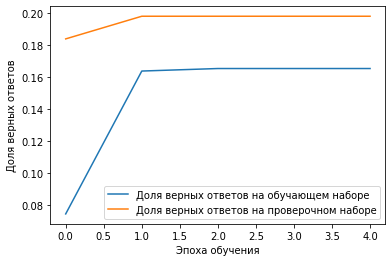

In [40]:
plt.plot(history_gru.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_gru.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()